#NOTE

> **Please upload all the required files, before running the notebook. For this notebook the required files are - fox-imgs.zip**


# Machine learning with image features

## Image Gradients
The difference in value between neighboring pixels is called an image gradient.<br>
We'll learn how to compute the image gradients with the following codes

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import hog
from skimage import data, color, exposure
import cv2

In [ ]:
# load image and turn it into grayscale
image = color.rgb2gray(data.retina())

In [ ]:
### Compute the horizontal gradient using the centered 1D filter.
### This is equivalent to replacing each non-border pixel with the
### difference between its right and left neighbors. The leftmost
### and rightmost edges have a gradient of 0.
gx = np.empty(image.shape, dtype=np.double)
gx[:, 0] = 0
gx[:, -1] = 0
gx[:, 1:-1] = image[:, :-2] - image[:, 2:]

In [ ]:
### Same deal for the vertical gradient
gy = np.empty(image.shape, dtype=np.double)
gy[0, :] = 0
gy[-1, :] = 0
gy[1:-1, :] = image[:-2, :] - image[2:, :]

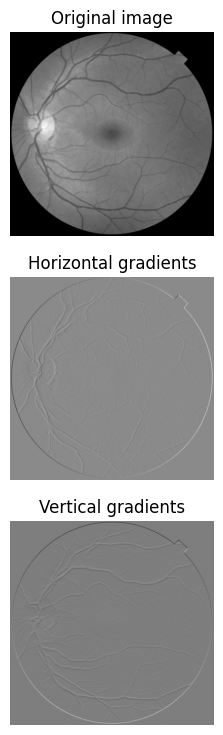

In [ ]:
### Matplotlib incantations
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(5, 9), sharex=True, sharey=True)
ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Original image')
ax1.set_adjustable('box')
ax2.axis('off')
ax2.imshow(gx, cmap=plt.cm.gray)
ax2.set_title('Horizontal gradients')
ax2.set_adjustable('box')
ax3.axis('off')
ax3.imshow(gy, cmap=plt.cm.gray)
ax3.set_title('Vertical gradients')
ax3.set_adjustable('box')

## Computing diagonal gradient of the image used in the example and visualizing it

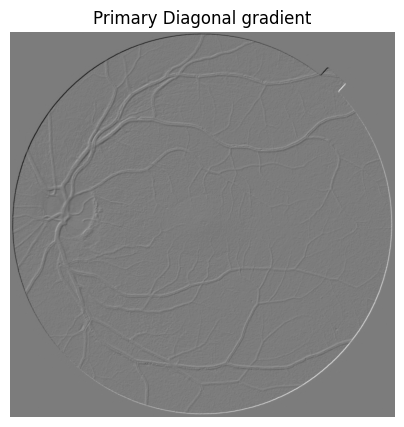

In [ ]:
gd = np.empty(image.shape, dtype = np.double)
gd[0, :] = 0
gd[-1, :] = 0
gd[:,0] = 0
gd[:, -1] = 0
gd[1:-1,1:-1] = image[:-2,:-2] - image[2:,2:]

fig,ax = plt.subplots(1,1,figsize = (5,5))
ax.axis('off')
ax.imshow(gd, cmap = plt.cm.gray)
ax.set_title('Primary Diagonal gradient')
ax.set_adjustable('box')

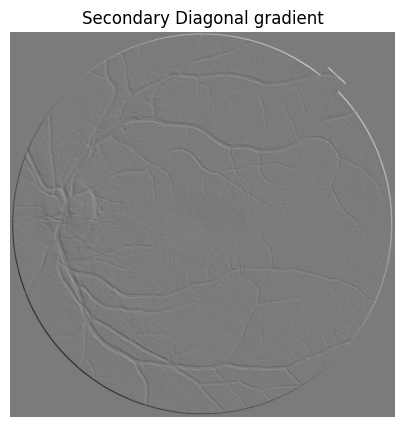

In [ ]:
gd = np.empty(image.shape, dtype = np.double)
gd[0, :] = 0
gd[-1, :] = 0
gd[:,0] = 0
gd[:, -1] = 0
gd[1:-1,1:-1] = image[2:,:-2] - image[:-2,2:]

fig,ax = plt.subplots(1,1,figsize = (5,5))
ax.axis('off')
ax.imshow(gd, cmap = plt.cm.gray)
ax.set_title('Secondary Diagonal gradient')
ax.set_adjustable('box')

## Why we don't directly use the simplest image features (color or number of pixels)?

**Answer**:

While features such as color and the no. of pixels may help to get some information, they often cannot tell the difference between various objects or classes. For example, two different objects-a red apple and a red car may have similar colors, but they also have different shapes and textures. Additionally, color is very sensitive to light conditions: the same object may appear in different colors depending on what kind of illumination it is exposed to. Relying on color alone would therefore make it very difficult to tell them apart. The no. of pixels can only tell how detailed the image is, it does not give information on what the image represents; and the number of pixels (e.g. image resolution) might change due to the distance or zoom of a camera, which would have made the model scale-sensitive. In contrast, higher-order features like edges, gradients, and textures capture patterns that describe the structure of objects in the image. These features are more reliable for distinguishing between objects than raw color values or pixel counts.



---

## HOG image features

In [ ]:
# read image and convert it to grayscale
image = color.rgb2gray(data.chelsea())
# extract HOG features from the input image with predefined parameters
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True)

hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 0.02))

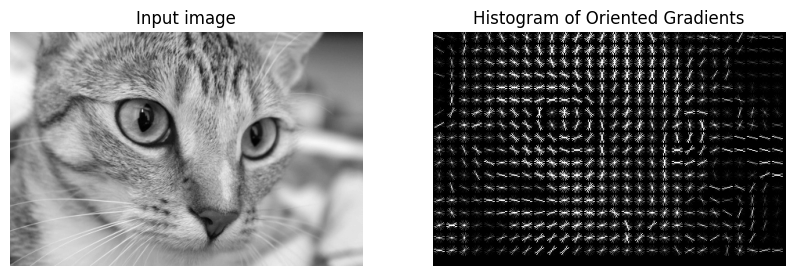

In [ ]:
# visualize the original image and the hog features
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')
ax1.set_adjustable('box')

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
ax2.set_adjustable('box')

## ORB keypoints extraction and visualization
Apart from HOG image features, another popular image feature is ORB.<br>
Please extract keypoints from the image used in HOG example using on ORB features and visualize the keypoints on the original image

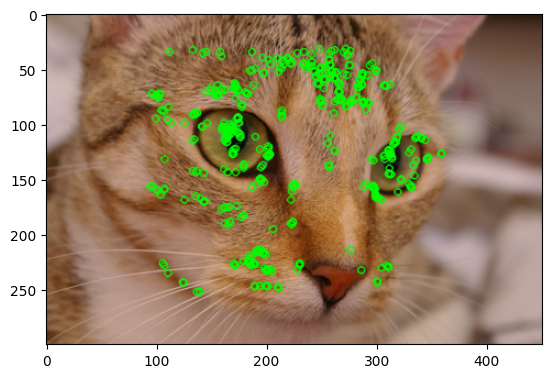

In [ ]:
img = data.chelsea()
orb = cv2.ORB_create()
kp, ds = orb.detectAndCompute(img, None)
img2 = cv2.drawKeypoints(img, kp, None, color = (0,255,0), flags = 0)
plt.imshow(img2)

## Bag-of-Visual-Words
In the above code, we create the code words only based on one image

In [ ]:
# defining feature extractor that we want to use (ORB feature used in this extractor)
def features(image):
    extractor = cv2.ORB_create()
    keypoints, descriptors = extractor.detectAndCompute(image, None)
    return keypoints, descriptors

In [ ]:
# builing visual words histogram based on the descriptors of the image and the clustering algorithm
def build_histogram(descriptor_list, cluster_alg):
    histogram = np.zeros(len(cluster_alg.cluster_centers_))
    cluster_result =  cluster_alg.predict(descriptor_list)
    for i in cluster_result:
        histogram[i] += 1.0
    return histogram

In [ ]:
# Clustring the bag-of-visual-words by Kmeans method
from sklearn.cluster import KMeans
img = data.chelsea()
kmeans = KMeans(n_clusters = 30)
kp, descriptor_list = features(img)
kmeans.fit(descriptor_list)
images = []
images.append(img)
preprocessed_image = []
for image in images:
      #image = gray(image)
      keypoint, descriptor = features(image)
      if (descriptor is not None):
          histogram = build_histogram(descriptor, kmeans)
          preprocessed_image.append(histogram)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 1.0, 'The histogram of visual words')

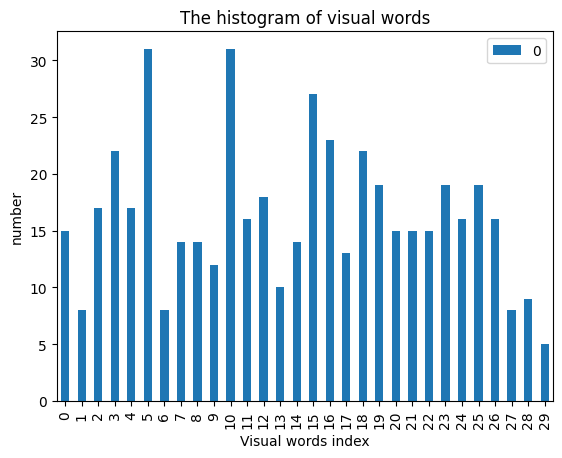

In [ ]:
import pandas as pd
df = pd.DataFrame(preprocessed_image[0])
df.plot.bar()
plt.xlabel('Visual words index')
plt.ylabel('number')
plt.title('The histogram of visual words')

## Bag-of-Visual-Words for multiple images
Creating bag-of-visual-words with 10 images and visualize the histogram of visual words. The 10 images belong to one category(FOX)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Figure size 640x480 with 0 Axes>

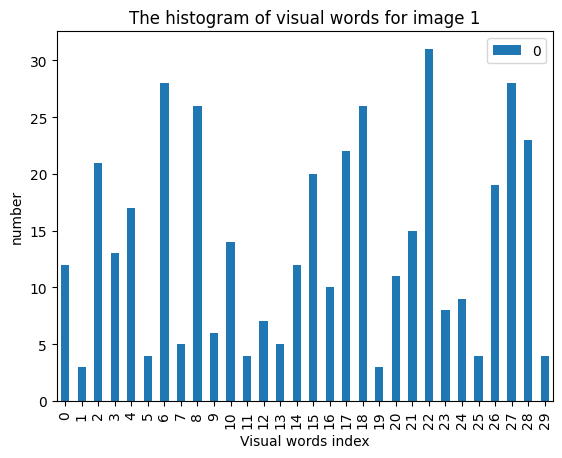

<Figure size 640x480 with 0 Axes>

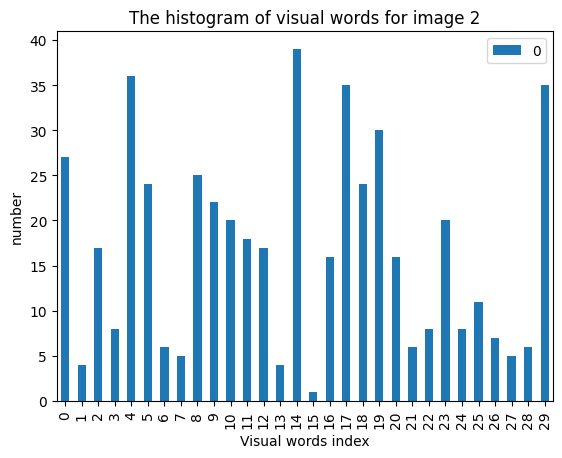

<Figure size 640x480 with 0 Axes>

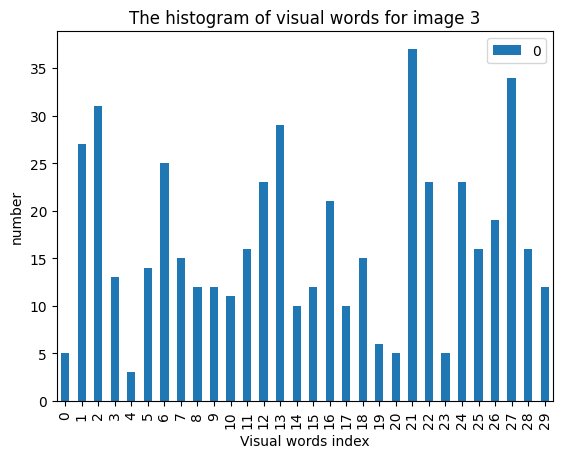

<Figure size 640x480 with 0 Axes>

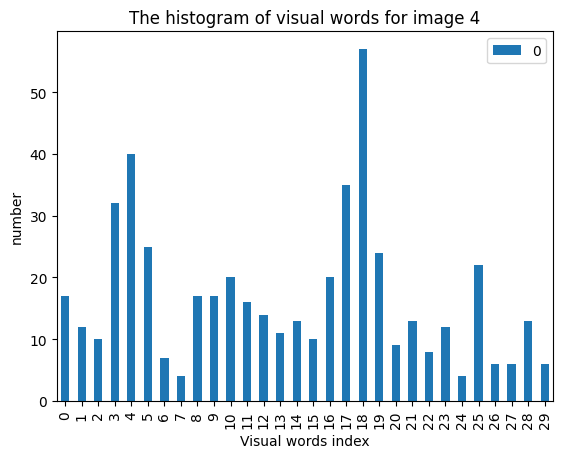

<Figure size 640x480 with 0 Axes>

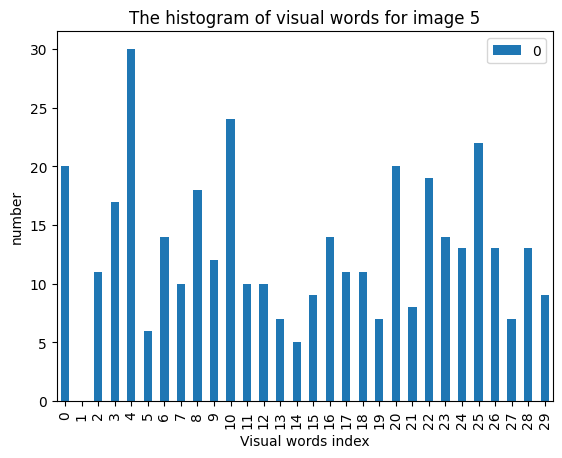

<Figure size 640x480 with 0 Axes>

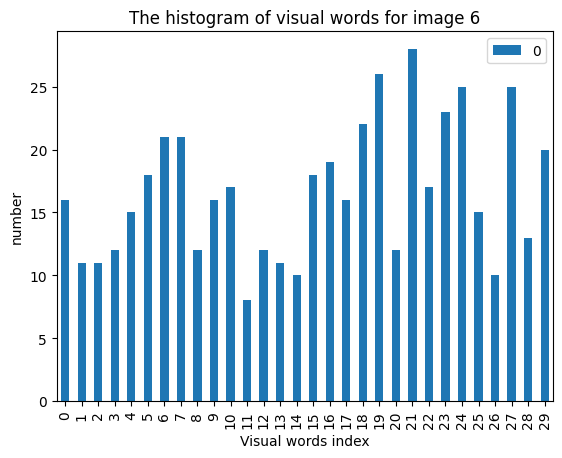

<Figure size 640x480 with 0 Axes>

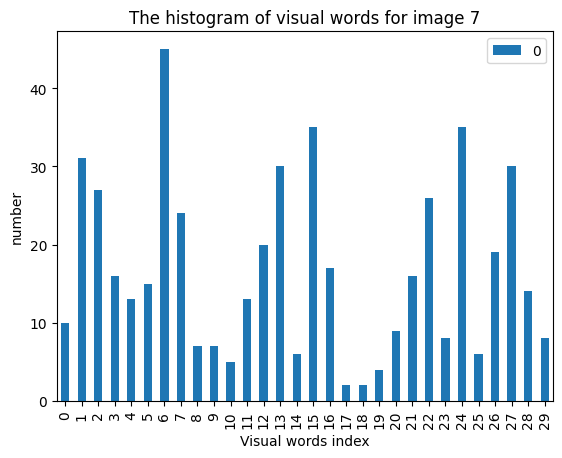

<Figure size 640x480 with 0 Axes>

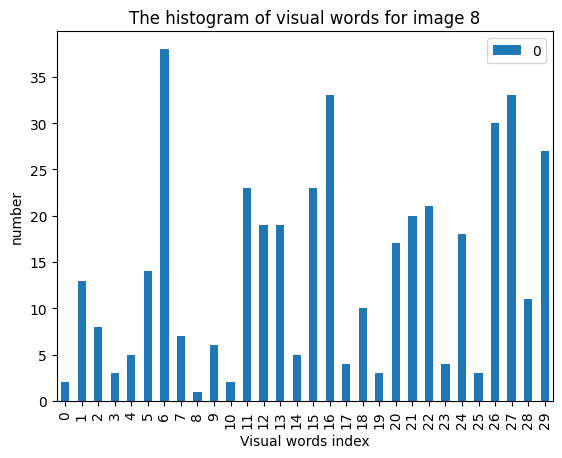

<Figure size 640x480 with 0 Axes>

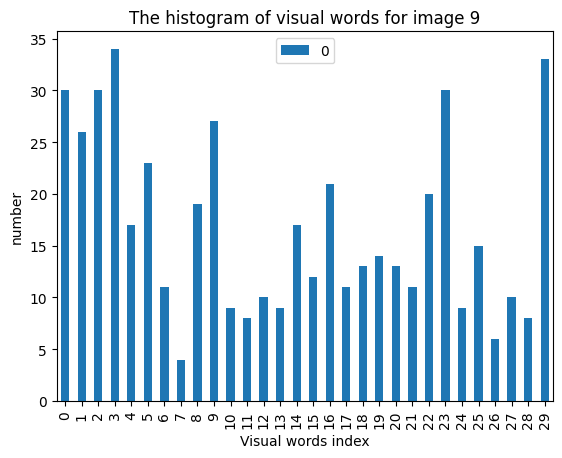

<Figure size 640x480 with 0 Axes>

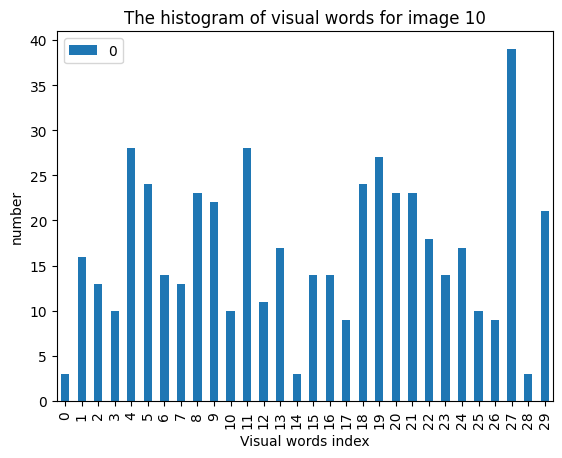

In [ ]:
from google.colab.patches import cv2_imshow
from google.colab import files
import os
import zipfile

with zipfile.ZipFile('/content/fox-imgs.zip', 'r') as zip_ref:
    zip_ref.extractall()

images = []
all_desp = []
preprocessed_image = []
kmeans = KMeans(n_clusters = 30)

path = '/content/fox-imgs'
for i in range(1,11):
  img = cv2.imread(os.path.join(path, str(i)+'.jpg'))
  images.append(img)
  if img.dtype == bool:
        img = (img * 255).astype(np.uint8)
  kp, des = features(img)
  if des is not None:
        all_desp.extend(des)

kmeans.fit(all_desp)

for image in images:
      keypoint, descriptor = features(image)
      if (descriptor is not None):
          histogram = build_histogram(descriptor, kmeans)
          preprocessed_image.append(histogram)

for i, histogram in enumerate(preprocessed_image):
    df = pd.DataFrame(histogram)
    plt.figure()
    df.plot.bar()
    plt.xlabel('Visual words index')
    plt.ylabel('number')
    plt.title(f'The histogram of visual words for image {i+1}')
    plt.show()

## Recall that the feature scaling does not have a large effect on classification accuracy (tf-idf). How about the effect of feature scaling in Bag-of-Visual-Words?

**Answer**:

Bag-of-Visual-Words (BoVW) for images deals with continuous feature vectors derived from keypoints and descriptors (like SIFT, ORB, etc.). The descriptors extracted from the image represent local features and are often multi-dimensional vectors and their values widely depend on the nature of the image (brightness, texture, etc.).These descriptors are then grouped using clustering algorithms (such as KMeans) into visual words. Feature scaling in BoVW can have a significant impact on the performance of the classification model. This is because BoVW represents images as histograms of visual word occurrences, and these histograms can have a wide range of values. If some dimensions of the feature vectors have much larger values than others, they will dominate the distance calculations, making the clustering biased. Without scaling, this imbalance can lead to poor clustering of visual words, which can reduce the quality of the BoVW model. With feature scaling, each dimension is normalized (e.g., via standardization or min-max scaling), which ensures that all features contribute equally to the clustering process, leading to more meaningful visual words.

---

## What is the advantage of ORB(Oriented FAST and Rotated Brief) over SURF (Speeded up robust features).

**Answer**:

The main advantage of **ORB** over **SURF** is that ORB is **free from patent restrictions**, while SURF is patented, making ORB more accessible for open-source projects. Additionally, ORB is **computationally faster** and more efficient than SURF, making it suitable for real-time applications, especially on devices with limited computational resources. Although SURF provides more accurate keypoint detection and is more robust to scale and rotation, ORB still offers good performance with lower computational cost, especially in real-time scenarios like mobile applications and embedded systems.

## Extract text from image

In [ ]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (3,057 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [ ]:
pip install pytesseract

In [ ]:
import pytesseract
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow
import requests
from io import BytesIO

response = requests.get("https://drive.google.com/uc?export=view&id=11eTV1ySQUN-vo0bD4ziRHZc_MMMqYivo")
text_image = Image.open(BytesIO(response.content))

# convert the PIL image to a numpy array
open_cv_image = np.array(text_image)
# Convert RGB to BGR a
open_cv_image = open_cv_image[:, :, ::-1].copy()

blurred = cv2.blur(open_cv_image, (3,3))

img = Image.fromarray(blurred)
text = pytesseract.image_to_string(img, lang='eng')
print (text)

EDUCATING THE MIND
WITHOUT EDUCATING
THE HEART IS NO
EDUCATION AT ALL.

-Aristotle



## Implementing **ORB** using **OpenCV** on a Face Image.


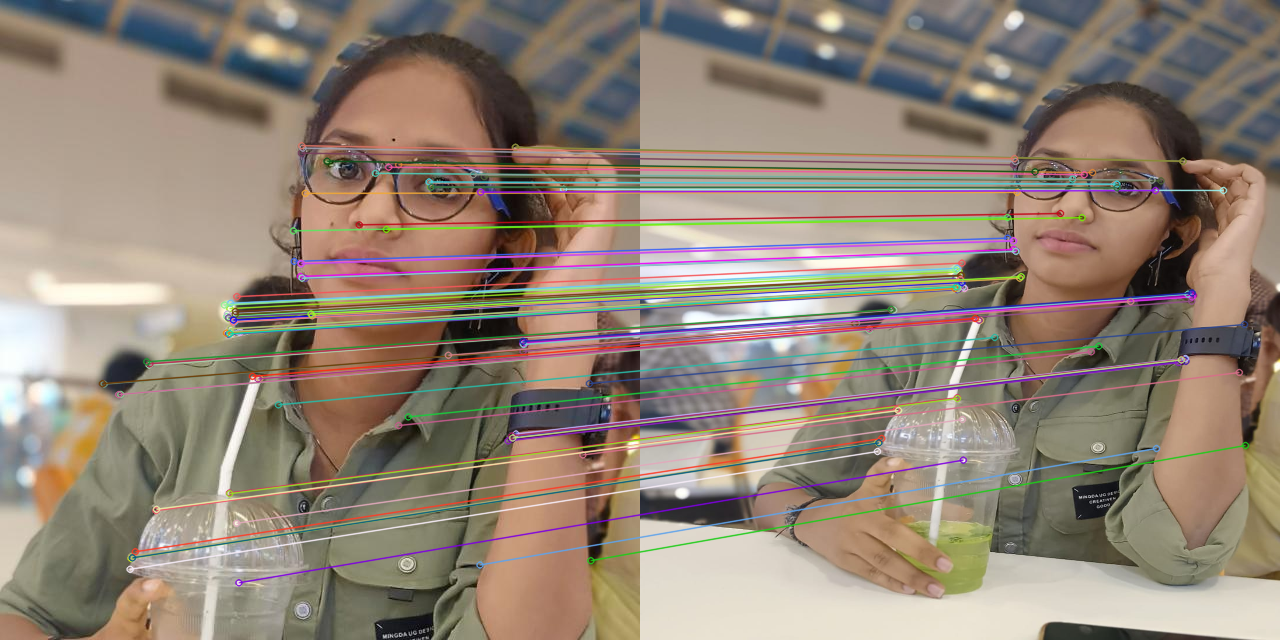

Number of Matching Keypoints Between The Training and Test Image: 215
Training image:


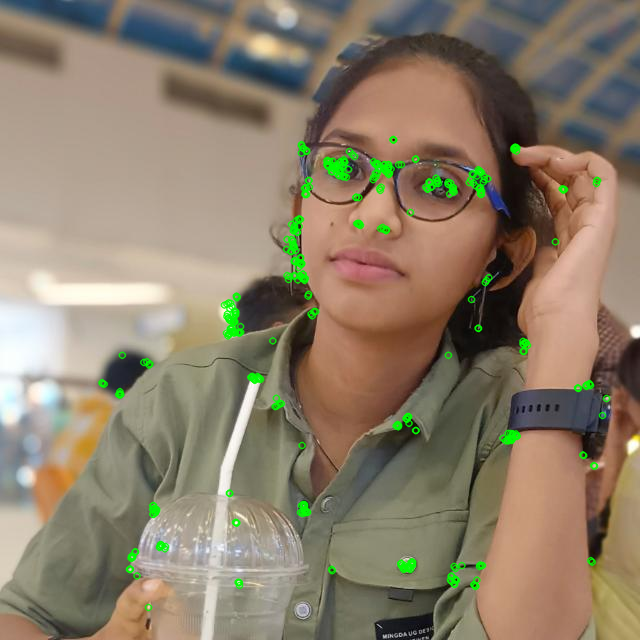

Number of Keypoints Detected In The Training Image: 500
Testing image:


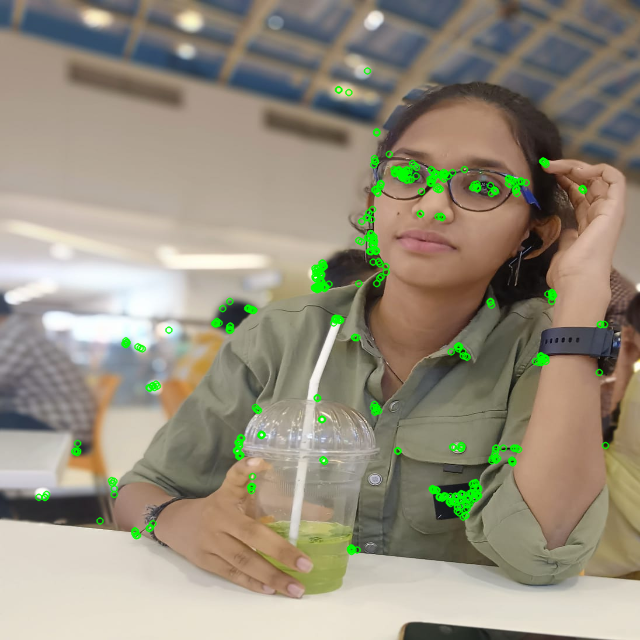

Number of Keypoints Detected In The Test Image: 500


In [ ]:
response = requests.get("https://drive.google.com/uc?export=view&id=1dbeLMpr71fOw9jdv-fMzBhLCwJwhSq_2")
my_image = Image.open(BytesIO(response.content))

#initialize ORB
orb = cv2.ORB_create()

# convert the PIL image to a numpy array
open_cv_image = np.array(my_image)
# Convert RGB to BGR
my_image = open_cv_image[:, :, ::-1].copy()

#get keypoints & descriptors of train image
kp1, des1 = orb.detectAndCompute(my_image, None)

# GET THE TEST IMAGE
response = requests.get("https://drive.google.com/uc?export=view&id=1LI55m8asZATwUx16RMFNDv_aG-1wZYRq")
test = Image.open(BytesIO(response.content))

# convert the PIL image to a numpy array
open_cv_image = np.array(test)
# Convert RGB to BGR
test = open_cv_image[:, :, ::-1].copy()

test = cv2.resize(test,(640,640))

#get keypoints & descriptors of test image
kp2, des2 = orb.detectAndCompute(test, None)

#creating a Brute-Force Matcher & match them
bf = cv2.BFMatcher(cv2.NORM_HAMMING2, crossCheck=True)
matches = bf.match(des1,des2)

#sort them in the order of their distance
matches = sorted(matches, key = lambda x:x.distance)
result = cv2.drawMatches(my_image, kp1, test, kp2, matches[:100], None, flags=2)

cv2_imshow(result)
print("Number of Matching Keypoints Between The Training and Test Image:", len(matches))

print("Training image:")
img2 = cv2.drawKeypoints(my_image, kp1, None, color = (0,255,0), flags = 0)
cv2_imshow(img2)
print("Number of Keypoints Detected In The Training Image:", len(kp1))

print("Testing image:")
img3 = cv2.drawKeypoints(test, kp2, None, color = (0,255,0), flags = 0)
cv2_imshow(img3)
print("Number of Keypoints Detected In The Test Image:", len(kp2))

## Question Time!

If you were to create a face recognition software which feature out of ORB, SURF and HOG would you use?